In [1]:
from eda_imports import *

In [2]:
pkl_files = sorted(glob.glob('../../gtf2csv-csvs/ensembl-release-93/csvs/*.pkl'))

In [3]:
len(pkl_files)

116

In [4]:
%%time
dfs_dd = {}
for f in tqdm(pkl_files):
    _df = pd.read_pickle(f)
    gtf_version = os.path.basename(f)
    dfs_dd[gtf_version] = _df

100%|██████████| 116/116 [03:20<00:00,  1.73s/it]

CPU times: user 2min 20s, sys: 59.9 s, total: 3min 20s
Wall time: 3min 20s


# Count protein-coding transcripts

In [5]:
sorted_keys = sorted(dfs_dd.keys())

In [6]:
%%time
trpt_biotypes_dfs = []
for k in tqdm(sorted_keys):
    df = dfs_dd[k]
    vc = df[['transcript_biotype', 'transcript_id']].drop_duplicates().transcript_biotype.value_counts().to_frame().T
    vc['gtf_version'] = k.replace('.pkl', '')
    trpt_biotypes_dfs.append(vc)

100%|██████████| 116/116 [00:35<00:00,  3.30it/s]

CPU times: user 31.6 s, sys: 3.66 s, total: 35.3 s
Wall time: 35.2 s


In [7]:
df_vc = pd.concat(trpt_biotypes_dfs, sort=True)

In [8]:
ndf_vc = df_vc.set_index('gtf_version')

In [9]:
ndf_vc.head()

,3prime_overlapping_ncRNA,IG_C_gene,IG_C_pseudogene,IG_D_gene,IG_D_pseudogene,IG_J_gene,IG_J_pseudogene,IG_LV_gene,IG_V_gene,IG_V_pseudogene,IG_pseudogene,Mt_rRNA,Mt_tRNA,TEC,TR_C_gene,TR_D_gene,TR_J_gene,TR_J_pseudogene,TR_V_gene,TR_V_pseudogene,antisense,bidirectional_promoter_lncRNA,lincRNA,macro_lncRNA,miRNA,misc_RNA,ncRNA,non_coding,non_stop_decay,nonsense_mediated_decay,piRNA,polymorphic_pseudogene,pre_miRNA,processed_pseudogene,processed_transcript,protein_coding,pseudogene,rRNA,rRNA_pseudogene,retained_intron,ribozyme,sRNA,scRNA,scaRNA,sense_intronic,sense_overlapping,snRNA,snoRNA,tRNA,tRNA_pseudogene,transcribed_processed_pseudogene,transcribed_unitary_pseudogene,transcribed_unprocessed_pseudogene,translated_processed_pseudogene,translated_unprocessed_pseudogene,unitary_pseudogene,unknown_likely_coding,unprocessed_pseudogene,vaultRNA
gtf_version,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ailuropoda_melanoleuca.ailMel1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,743.0,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,21136,769.0,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1211.0,659.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anas_platyrhynchos.BGI_duck_1.0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16353,249.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anolis_carolinensis.AnoCar2.0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4679.0,NaN,423.0,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,19176,146.0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aotus_nancymaae.Anan_2.0.93,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,32.0,NaN,NaN,NaN,1829.0,NaN,897.0,2945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,42418,299.0,585,NaN,NaN,6.0,NaN,NaN,45.0,NaN,NaN,1931.0,701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Astyanax_mexicanus.AstMex102.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499.0,NaN,398.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23698,20.0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ndf_vc = ndf_vc[np.sort(ndf_vc.columns)]

In [11]:
mus_musculus_to_ignore = [_ for _ in ndf_vc.index.values if _.startswith('Mus_musculus') and _ != 'Mus_musculus.GRCm38.93']

In [12]:
mus_musculus_to_ignore

['Mus_musculus_129s1svimj.129S1_SvImJ_v1.93',
 'Mus_musculus_aj.A_J_v1.93',
 'Mus_musculus_akrj.AKR_J_v1.93',
 'Mus_musculus_balbcj.BALB_cJ_v1.93',
 'Mus_musculus_c3hhej.C3H_HeJ_v1.93',
 'Mus_musculus_c57bl6nj.C57BL_6NJ_v1.93',
 'Mus_musculus_casteij.CAST_EiJ_v1.93',
 'Mus_musculus_cbaj.CBA_J_v1.93',
 'Mus_musculus_dba2j.DBA_2J_v1.93',
 'Mus_musculus_fvbnj.FVB_NJ_v1.93',
 'Mus_musculus_lpj.LP_J_v1.93',
 'Mus_musculus_nodshiltj.NOD_ShiLtJ_v1.93',
 'Mus_musculus_nzohlltj.NZO_HlLtJ_v1.93',
 'Mus_musculus_pwkphj.PWK_PhJ_v1.93',
 'Mus_musculus_wsbeij.WSB_EiJ_v1.93']

In [13]:
ndf_vc.drop(mus_musculus_to_ignore, inplace=True)

In [14]:
ndf_vc.columns

Index(['3prime_overlapping_ncRNA', 'IG_C_gene', 'IG_C_pseudogene', 'IG_D_gene', 'IG_D_pseudogene', 'IG_J_gene', 'IG_J_pseudogene', 'IG_LV_gene', 'IG_V_gene', 'IG_V_pseudogene', 'IG_pseudogene', 'Mt_rRNA', 'Mt_tRNA', 'TEC', 'TR_C_gene', 'TR_D_gene', 'TR_J_gene', 'TR_J_pseudogene', 'TR_V_gene',
       'TR_V_pseudogene', 'antisense', 'bidirectional_promoter_lncRNA', 'lincRNA', 'macro_lncRNA', 'miRNA', 'misc_RNA', 'ncRNA', 'non_coding', 'non_stop_decay', 'nonsense_mediated_decay', 'piRNA', 'polymorphic_pseudogene', 'pre_miRNA', 'processed_pseudogene', 'processed_transcript',
       'protein_coding', 'pseudogene', 'rRNA', 'rRNA_pseudogene', 'retained_intron', 'ribozyme', 'sRNA', 'scRNA', 'scaRNA', 'sense_intronic', 'sense_overlapping', 'snRNA', 'snoRNA', 'tRNA', 'tRNA_pseudogene', 'transcribed_processed_pseudogene', 'transcribed_unitary_pseudogene',
       'transcribed_unprocessed_pseudogene', 'translated_processed_pseudogene', 'translated_unprocessed_pseudogene', 'unitary_pseudogene', 'unk

In [15]:
HIGHLIGHT_SPECIES    =    [
    'Saccharomyces_cerevisiae.R64-1-1.93',
    'Drosophila_melanogaster.BDGP6.93',
    'Gallus_gallus.Gallus_gallus-5.0.93',    #    chicken
    'Xenopus_tropicalis.JGI_4.2.93',
    'Canis_familiaris.CanFam3.1.93',    #    dog
    'Homo_sapiens.GRCh38.93',
    'Bos_taurus.UMD3.1.93',
    'Caenorhabditis_elegans.WBcel235.93',
    'Mus_musculus.GRCm38.93',
    'Rattus_norvegicus.Rnor_6.0.93',
    'Danio_rerio.GRCz11.93',    #    zebra fish
]

In [16]:
def color_species(s):
    for h in HIGHLIGHT_SPECIES:
        if s.startswith(h):
            return 'red'
    return 'black'

In [17]:
%%time
for trpt_type in tqdm(ndf_vc.columns):
    fig, ax = plt.subplots(1, 1, figsize=(40, 8))

    sr = ndf_vc[trpt_type].sort_values()

    colors = [color_species(_) for _ in ndf_vc.index]

    sr.plot.bar(ax=ax, color=colors)

#     for t in ax.xaxis.get_major_ticks():
#         t.label.set_horizontalalignment('right')

    ax.yaxis.grid()
    ax.set_title(f'{trpt_type}_transcripts', fontsize=25)
    ax.set_ylabel('#')
    
    out = f'../../gtf2csv-csvs/ensembl-release-93/figs/transcripts/{trpt_type}_transcripts.jpg'
    plt.savefig(out, bbox_inches='tight', dpi=200)
    fig.clf()
    plt.close(fig)
#     break

100%|██████████| 59/59 [02:55<00:00,  2.98s/it]

CPU times: user 2min 36s, sys: 17.5 s, total: 2min 54s
Wall time: 2min 55s


# Plot total number of transcripts

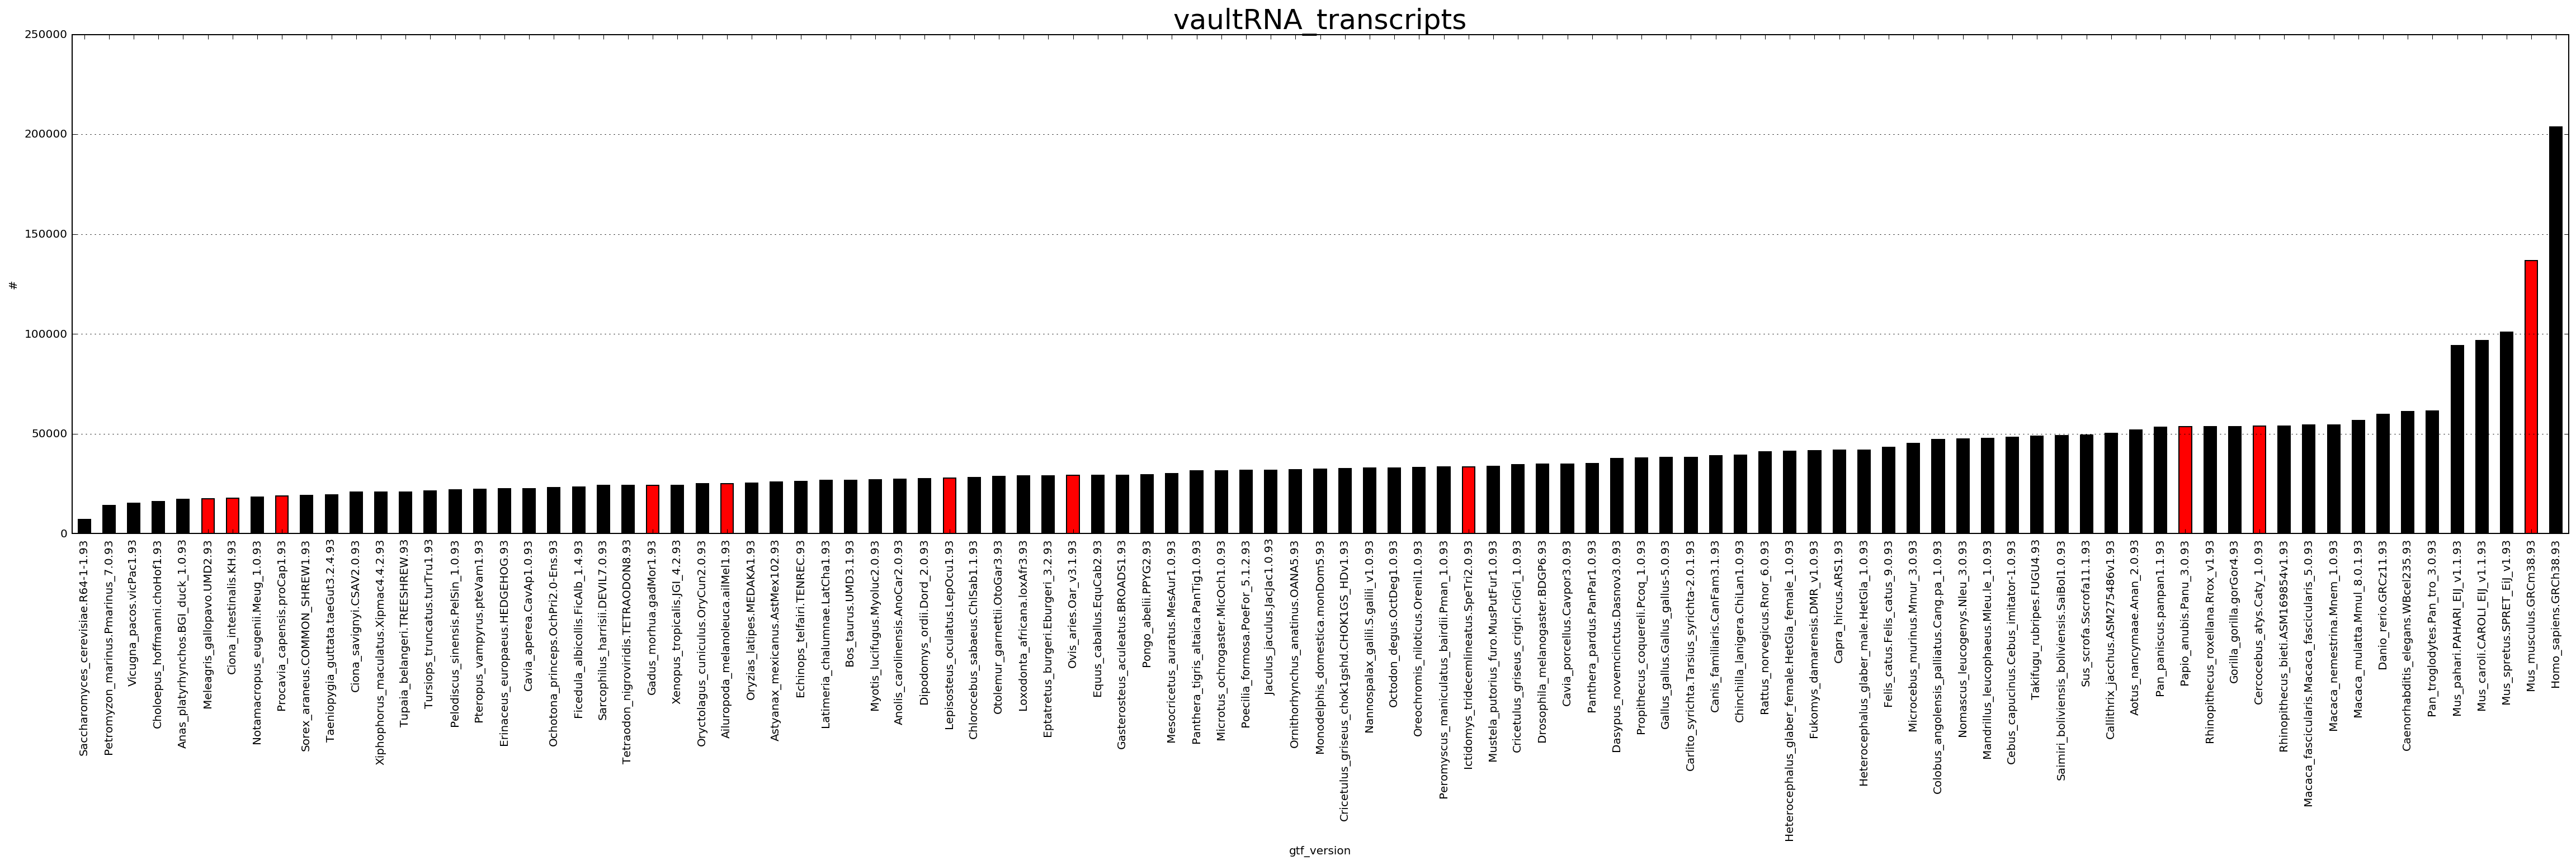

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(40, 8))

sr = ndf_vc.sum(axis=1).astype(int).sort_values()
colors = [color_species(_) for _ in ndf_vc.index]

sr.plot.bar(ax=ax, color=colors)

ax.yaxis.grid()
ax.set_title(f'{trpt_type}_transcripts', fontsize=25)
ax.set_ylabel('#')

out = f'../../gtf2csv-csvs/ensembl-release-93/figs/transcripts/all_transcripts.jpg'
plt.savefig(out, bbox_inches='tight', dpi=200)

# Count protein coding genes

In [19]:
res_dd = {}
for k in tqdm(sorted_keys):
    _df = dfs_dd[k]
    k2 = k.replace('.pkl', '')
    res_dd[k2] = _df.query('gene_biotype == "protein_coding"').gene_id.unique().shape[0]

100%|██████████| 116/116 [01:00<00:00,  1.93it/s]


In [20]:
df_num_genes = pd.DataFrame(list(res_dd.items()), columns=['gtf_version', 'num_genes'])

In [21]:
df_num_genes.head()

,gtf_version,num_genes
0,Ailuropoda_melanoleuca.ailMel1.93,19343
1,Anas_platyrhynchos.BGI_duck_1.0.93,15634
2,Anolis_carolinensis.AnoCar2.0.93,18595
3,Aotus_nancymaae.Anan_2.0.93,20320
4,Astyanax_mexicanus.AstMex102.93,23042


In [22]:
df_num_trpts = ndf_vc['protein_coding'].reset_index().rename(columns={'protein_coding': 'num_protein_coding_trpts'})

In [23]:
df_num_genes.head(2)

,gtf_version,num_genes
0,Ailuropoda_melanoleuca.ailMel1.93,19343
1,Anas_platyrhynchos.BGI_duck_1.0.93,15634


In [24]:
df_num_trpts.head(2)

,gtf_version,num_protein_coding_trpts
0,Ailuropoda_melanoleuca.ailMel1.93,21136
1,Anas_platyrhynchos.BGI_duck_1.0.93,16353


In [25]:
merged = df_num_genes.merge(df_num_trpts, on='gtf_version')

In [26]:
merged['color'] = merged.gtf_version.apply(color_species)

In [27]:
merged = merged.sort_values('num_genes').set_index('gtf_version')

In [28]:
merged.head()

,num_genes,num_protein_coding_trpts,color
gtf_version,,,
Saccharomyces_cerevisiae.R64-1-1.93,6692,6692,red
Petromyzon_marinus.Pmarinus_7.0.93,10415,11442,black
Ciona_savignyi.CSAV2.0.93,11616,20155,black
Vicugna_pacos.vicPac1.93,11765,11806,black
Choloepus_hoffmanni.choHof1.93,12393,12435,black


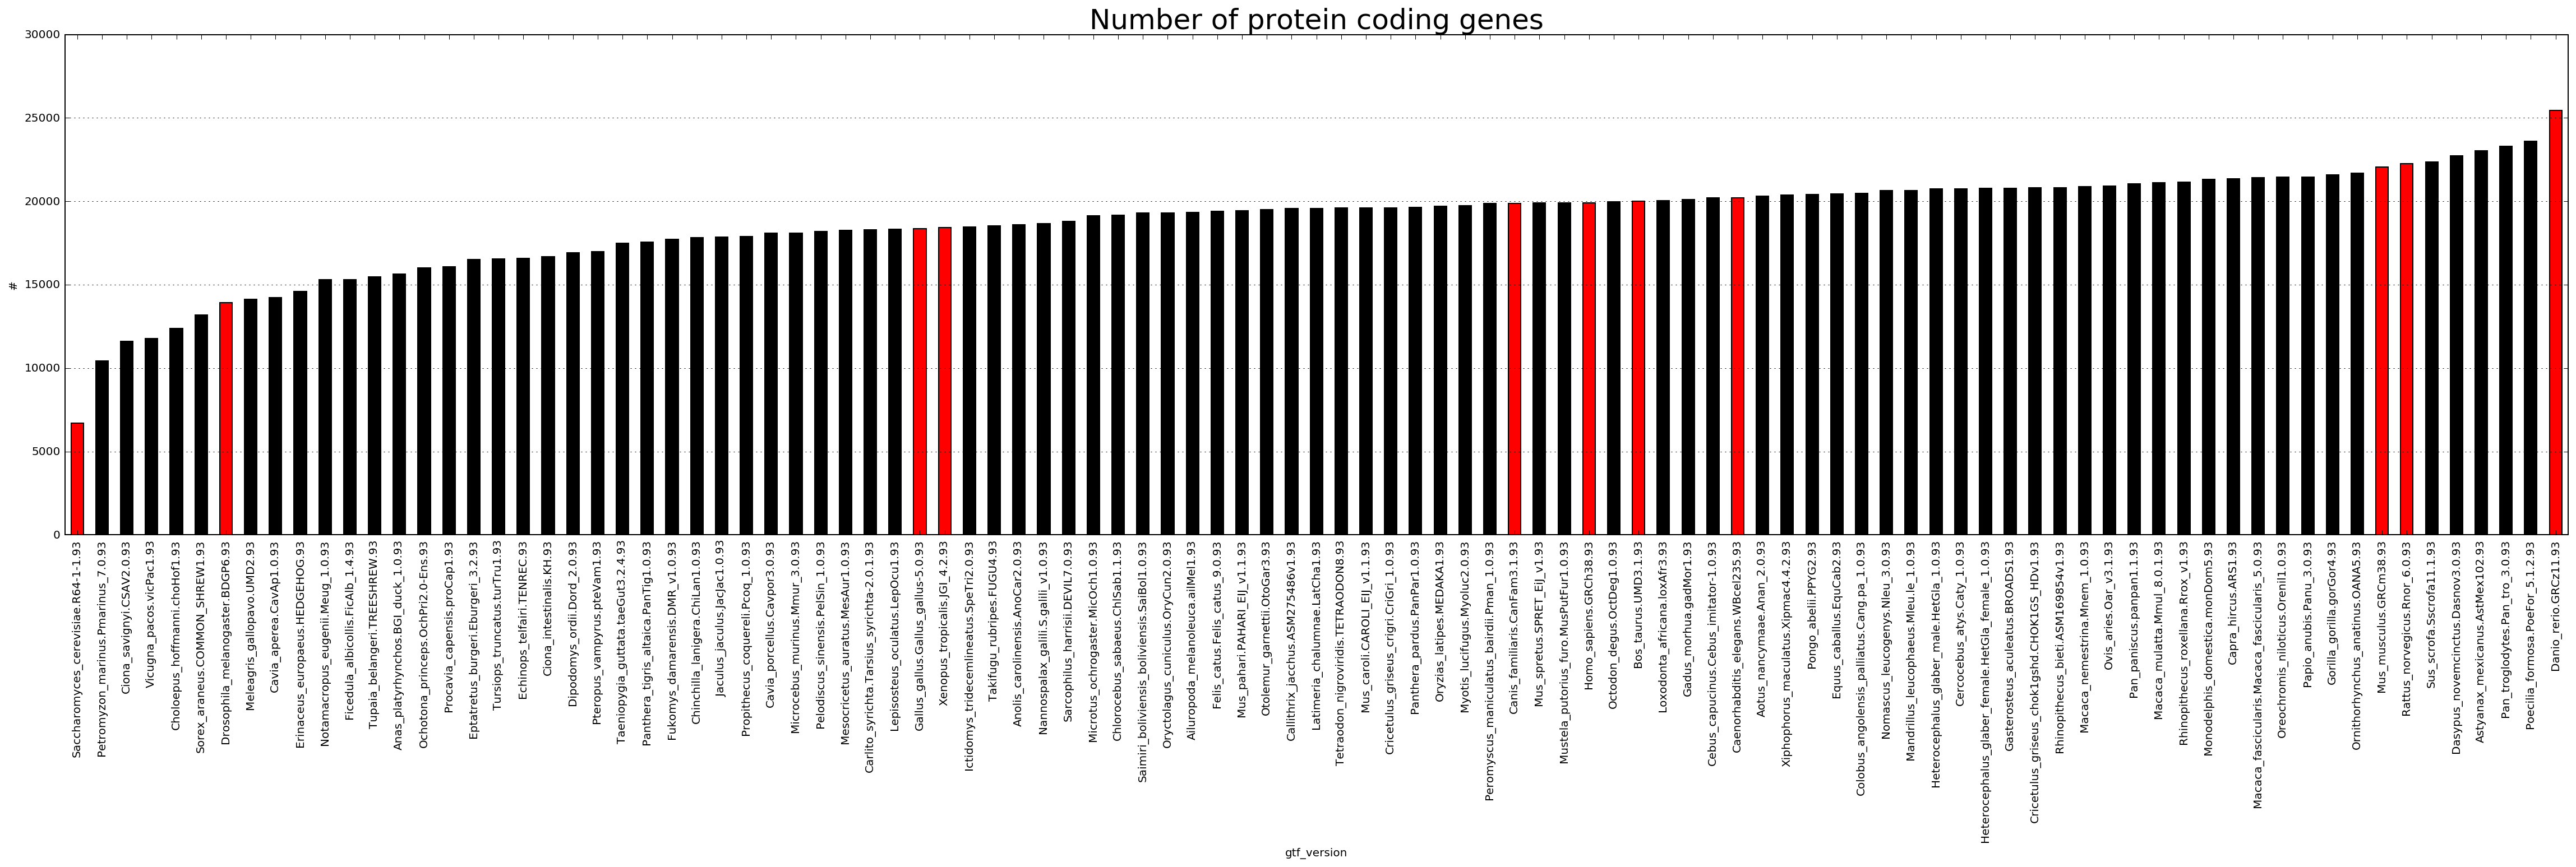

In [29]:
ax = merged['num_genes'].plot.bar(color=merged.color.values, figsize=(40, 8))
ax.yaxis.grid()

ax.set_title('Number of protein coding genes', fontsize=25)
ax.set_ylabel('#')

out = f'../../gtf2csv-csvs/ensembl-release-93/figs/num_protein_coding_genes.jpg'
plt.savefig(out, bbox_inches='tight', dpi=200)
fig.clf()
plt.close(fig)

In [30]:
merged.head(2)

,num_genes,num_protein_coding_trpts,color
gtf_version,,,
Saccharomyces_cerevisiae.R64-1-1.93,6692,6692,red
Petromyzon_marinus.Pmarinus_7.0.93,10415,11442,black


In [31]:
from adjustText import adjust_text

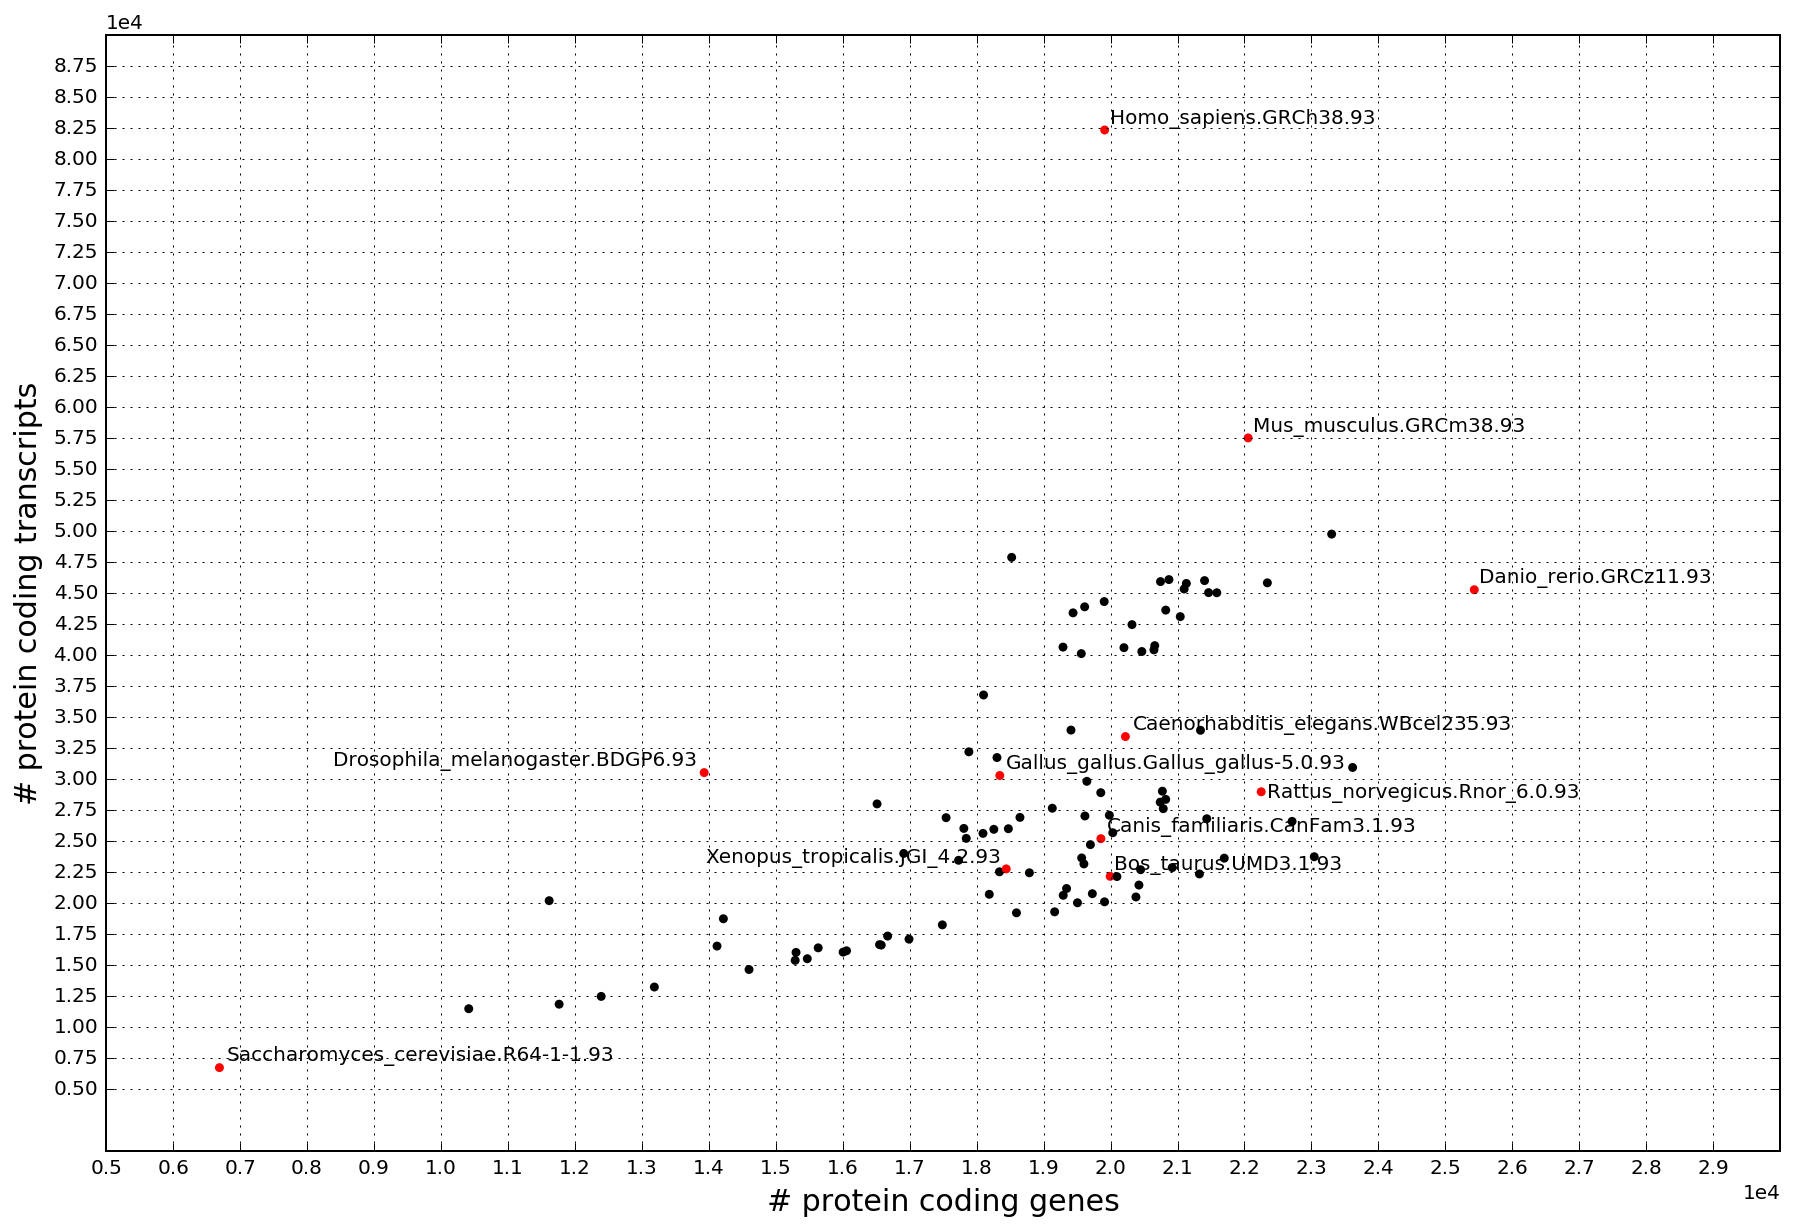

In [32]:
ax = merged.plot.scatter(x='num_genes', y='num_protein_coding_trpts', edgecolor='none', figsize=(15, 10), color=merged.color.values)

texts = []
for k, row in merged.query(f'gtf_version in {HIGHLIGHT_SPECIES}').iterrows():
    txt = ax.text(row.num_genes, row.num_protein_coding_trpts, k)
    texts.append(txt)
adjust_text(texts)

ax.set_xticks(np.arange(5000, 30000, 1000))
ax.set_yticks(np.arange(5000, 90000, 2500))
ax.set_xlabel('# protein coding genes', fontsize=15)
ax.set_ylabel('# protein coding transcripts', fontsize=15)
ax.grid()
ax.ticklabel_format(style='sci', scilimits=(0, 0))
out = f'../../gtf2csv-csvs/ensembl-release-93/figs/num_protein_coding_genes_vs_transcripts.jpg'
plt.savefig(out, bbox_inches='tight', dpi=200)